<a href="https://colab.research.google.com/github/mugupta23/F1-data-analysis-final/blob/main/CCPX4199_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
circuits <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/circuits.csv')
constructor_results <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/constructor_results.csv')
constructor_standings <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/constructor_standings.csv')
constructors <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/constructors.csv')
driver_standings <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/driver_standings.csv')
drivers <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/drivers.csv')
lap_times <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/lap_times.csv')
pit_stops <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/pit_stops.csv')
qualifying <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/qualifying.csv')
races <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/races.csv')
results <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/results.csv')
seasons <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/seasons.csv')
status <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/status.csv')

In [44]:
# since there are multiple datasets, I selected the ones I needed that had matching IDs and merged them
con_data_1 <- merge(constructors, constructor_standings, by = "constructorId")
con_data_2 <- merge(con_data_1, races, by = "raceId")
con_data <- merge(con_data_2, results, by = c("raceId", "constructorId"))

In [45]:
con_data

raceId,constructorId,constructorRef,name.x,nationality,url.x,constructorStandingsId,points.x,position.x,positionText.x,⋯,positionOrder,points.y,laps,time.y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,⋯,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Force_India,4043,0.0,6,6,⋯,9,0,58,+6.335,5662119,43,11,1:28.943,214.640,1
1,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Force_India,4043,0.0,6,6,⋯,11,0,58,+7.374,5663158,51,12,1:29.005,214.491,1
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,4044,0.0,7,7,⋯,10,0,58,+7.085,5662869,48,5,1:28.283,216.245,1
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,4044,0.0,7,7,⋯,14,0,55,\N,\N,36,2,1:27.988,216.970,4
1,23,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,4038,18.0,1,1,⋯,2,8,58,+0.807,5656591,43,14,1:29.066,214.344,1
1,23,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,4038,18.0,1,1,⋯,1,10,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1
1,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Prix_Engineering,4041,3.0,4,4,⋯,18,0,17,\N,\N,6,18,1:29.923,212.301,3
1,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Prix_Engineering,4041,3.0,4,4,⋯,6,3,58,+5.722,5661506,48,1,1:27.706,217.668,1
1,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formula_One,4040,4.0,3,3,⋯,17,0,24,\N,\N,17,19,1:30.502,210.943,20


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


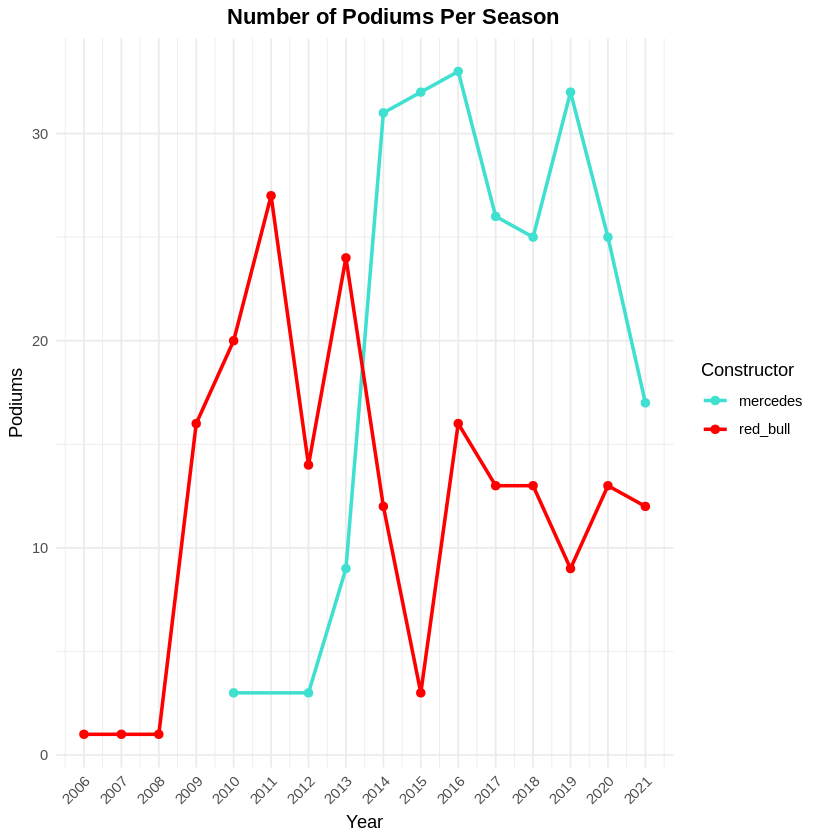

In [65]:
library(dplyr)
library(ggplot2)

# I created a new dataset and filtered it to include data for the two teams when they placed 1st, 2nd, and 3rd
podium_data <- con_data %>%
  filter(constructorRef %in% c("red_bull", "mercedes"),
         position.y %in% 1:3) %>%
  group_by(year, constructorRef) %>%
  summarize(podiums = n())

# then I created the plot and customized it to reflect the team colors
ggplot(podium_data, aes(x = year, y = podiums, color = constructorRef))+
  geom_line(size = 1)+
  geom_point(size = 2)+
  scale_x_continuous(breaks = seq(min(podium_data$year), max(podium_data$year), by = 1))+ # creates a break for every year
  scale_color_manual(values = c("red_bull" = "red", "mercedes" = "turquoise")) +
  labs(title = "Number of Podiums Per Season",
    x = "Year",
    y = "Podiums",
    color = "Constructor"
  )+
  theme_minimal()+
  theme(
    plot.title = element_text(face = "bold", hjust = 0.6),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

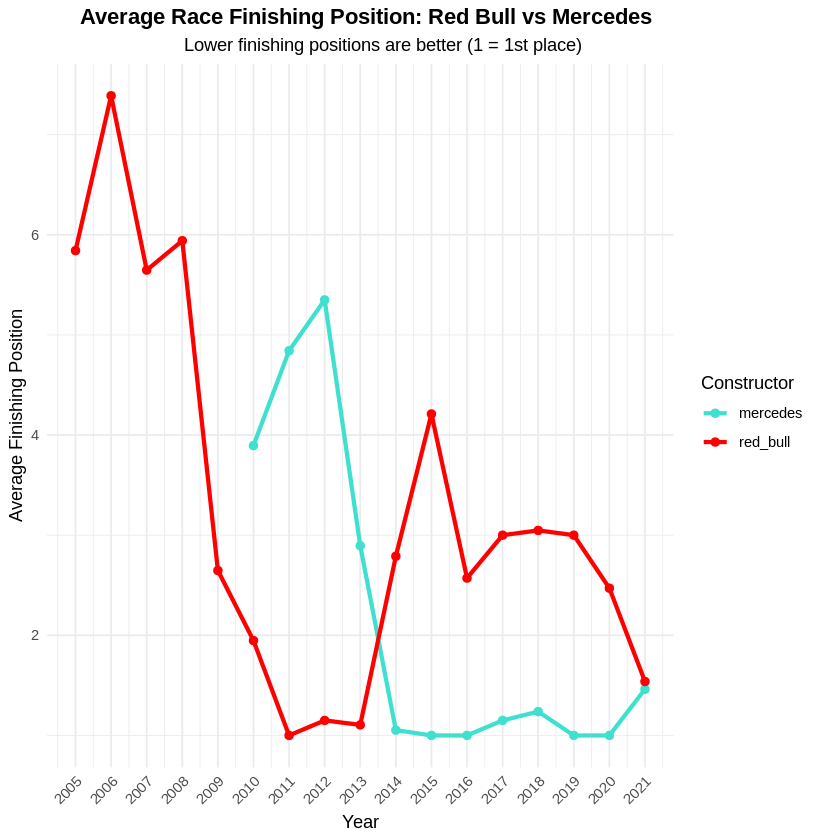

In [66]:
# I created a new dataset and filtered the data for the two teams, grouping the data by year and team
finish_data <- con_data %>%
  filter(constructorRef %in% c("red_bull", "mercedes")) %>%
  group_by(year, constructorRef) %>%
  summarize(avg_finish = mean(position.x, na.rm = TRUE), .groups = "drop") %>% # for each group, the mean position is calculated and stored in a new column (avg_finish)
  group_by(year) %>% # re-groups the data by year to compare avg_finish between two teams each year
  ungroup()

# I created the plot and added a subtitle to help clarify how to interpret the plot
ggplot(finish_data, aes(x = year, y = avg_finish, color = constructorRef))+
  geom_line(size = 1.2)+
  geom_point(size = 2)+
  scale_x_continuous(breaks = seq(min(finish_data$year), max(finish_data$year), by = 1))+
  scale_color_manual(values = c("red_bull" = "red", "mercedes" = "turquoise"))+
  labs(
    title = "Average Race Finishing Position: Red Bull vs Mercedes",
    subtitle = "Lower finishing positions are better (1 = 1st place)",
    x = "Year",
    y = "Average Finishing Position",
    color = "Constructor"
  )+
  theme_minimal()+
  theme(
    plot.title = element_text(face = "bold", hjust = 0.6),
    plot.subtitle = element_text(hjust = 0.6),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

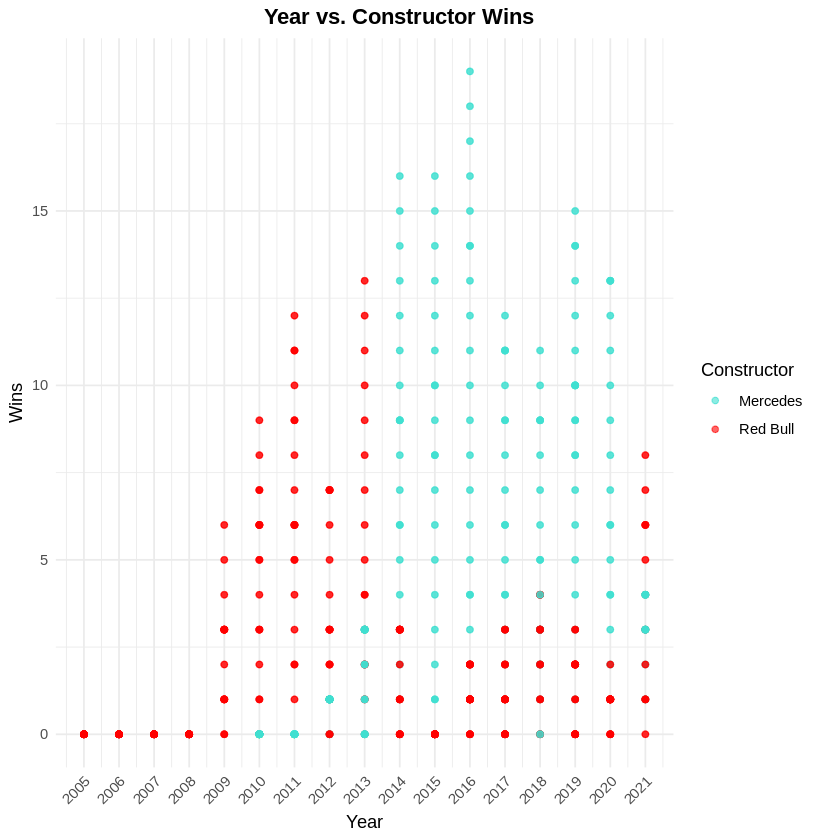

In [64]:
ggplot(win_data, aes(x = year, y = wins, color = name.x))+
  geom_point(alpha = 0.6)+
  scale_color_manual(values = c("Red Bull" = "red", "Mercedes" = "turquoise"))+
  scale_x_continuous(breaks = seq(min(con_data$year), max(con_data$year), by = 1))+
  labs(
    title = "Year vs. Constructor Wins",
    x = "Year",
    y = "Wins",
    color = "Constructor"
  )+
  theme_minimal()+
  theme(
    plot.title = element_text(face = "bold", hjust = 0.6),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )